Bienvenido al Notebook del Capítulo 4: Copiloto financiero con datos en tiempo real


/tmp/ipython-input-3-3153169934.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(activo, start=fecha_inicio)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-3153169934.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  precio_inicial = float(df['Close'].iloc[0])
/tmp/ipython-input-3-3153169934.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  precio_final = float(df['Close'].iloc[-1])
/tmp/ipython-input-3-3153169934.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(activo, start=fecha_inicio)
[*********************100%***********************]  1 of 1 completed
/tmp/ipyth

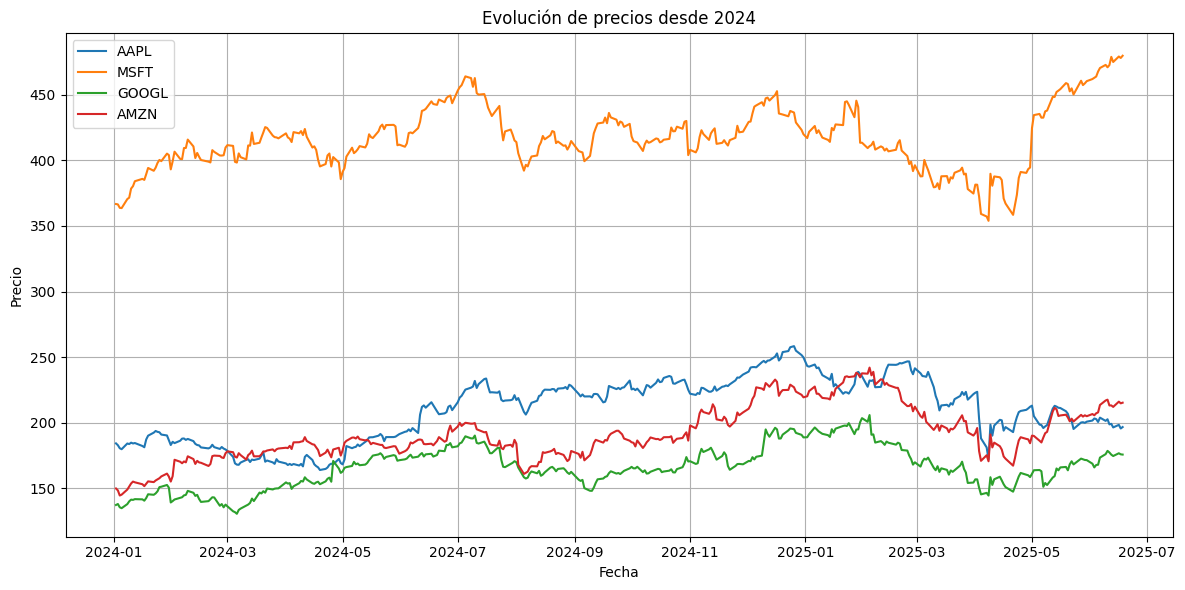


Tabla resumen de variación acumulada:


Activo  Precio Inicial  Precio Final  Variación (%) Alerta
0   AAPL          184.29        196.75           6.76     ⚠️
1   MSFT          366.71        479.73          30.82     ⚠️
2  GOOGL          137.35        175.77          27.98     ⚠️
3   AMZN          149.93        215.31          43.61     ⚠️


Recomendaciones automáticas:
Alerta: AAPL varió 6.76% desde 2024-01-01. Revise este activo.
Alerta: MSFT varió 30.82% desde 2024-01-01. Revise este activo.
Alerta: GOOGL varió 27.98% desde 2024-01-01. Revise este activo.
Alerta: AMZN varió 43.61% desde 2024-01-01. Revise este activo.


In [ ]:
# Capítulo 4 - Notebook: Tu copiloto financiero automatizado

# ᵀᴹᴸ Bienvenida
print("Bienvenido al Notebook del Capítulo 4: Copiloto financiero con datos en tiempo real")

# ᵀᴾᴼ Instalación de librerías necesarias
!pip install yfinance --quiet

# ᵀᴾᴼ Importación de librerías
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ᵀᴾᴼ Definición de activos a analizar
activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
fecha_inicio = "2024-01-01"

# ᵀᴾᴼ Descarga de datos y cálculo de variación
datos = {}
variaciones = []

for activo in activos:
    df = yf.download(activo, start=fecha_inicio)
    precio_inicial = float(df['Close'].iloc[0])
    precio_final = float(df['Close'].iloc[-1])
    variacion = round(((precio_final - precio_inicial) / precio_inicial) * 100, 2)
    datos[activo] = df
    variaciones.append({
        'Activo': activo,
        'Precio Inicial': round(precio_inicial, 2),
        'Precio Final': round(precio_final, 2),
        'Variación (%)': variacion,
        'Alerta': '⚠️' if abs(variacion) > 5 else '✅'
    })

# ᵀᴾᴼ Visualización gráfica de precios
plt.figure(figsize=(12,6))
for activo in activos:
    plt.plot(datos[activo].index, datos[activo]['Close'], label=activo)

plt.title("Evolución de precios desde 2024")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ᵀᴾᴼ Tabla resumen con alertas
df_resumen = pd.DataFrame(variaciones)
print("\nTabla resumen de variación acumulada:")
display(df_resumen)

# ᵀᴾᴼ Recomendación simple
print("\nRecomendaciones automáticas:")
for fila in variaciones:
    if fila['Alerta'] == '⚠️':
        print(f"Alerta: {fila['Activo']} varió {fila['Variación (%)']}% desde {fecha_inicio}. Revise este activo.")
    else:
        print(f"{fila['Activo']} está dentro del rango esperado (±5%).")